# A visual exploration of KL-divergence

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Generated samples of the true distrubution')

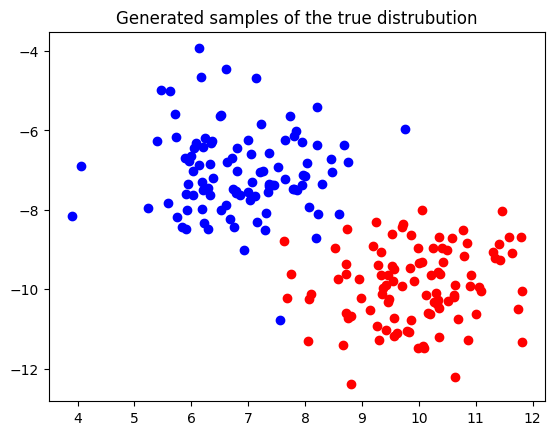

In [34]:
rng = np.random.default_rng(seed = 0)

N = 100
D = 2

# distrubution 1 (True Distribution)
p1 = rng.normal(loc=np.array([10, -10]), scale=1, size=(N, D))
p2 = rng.normal(loc= np.array([7, -7]), scale=1, size=(N, D))
params_P = np.vstack([np.array([10, -10, 1]),
                     np.array([7, -1, 1])])

P = np.vstack([p1, p2])

# plot distrubution
plt.scatter(p1[:, 0], p1[:, 1], color="r")
plt.scatter(p2[:, 0], p2[:, 1], color="b")
plt.title("Generated samples of the true distrubution")


# General objective of the problem

Find $Q_{mean}$, $Q_{var}$ such that $D_{KL}(P||Q)$ OR $D_{KL}(Q||P)$ is minimzed

In [29]:
from scipy.stats import norm
from scipy.special import logsumexp

In [ ]:
def forwardKL_obj(Q_params, input_params) -> float:
    """
    Computes the Monte-Carlo Estimate of forward KL between P & Q: KL(P||Q)

    D_{KL} = 1 / N (logP(x) - logQ(x)) 

    P_params: A list of parameters of each normal distribution (M, 3)
    """
    Q_mean, Q_var = Q_params[:2], Q_params[:-1]
    P_params, N_samples = input_params
    M = P_params.shape[0]

    component_N = rng.choice(M, N_samples)
    P_samples_ND = rng.normal(loc=P_params[component_N, :2], scale=P_params[component_N, -1], size=(N_samples, 2))

    logP_NMD = norm.logpdf(P_samples_ND[:, np.newaxis, :], loc=P_params[np.newaxis, :, :2], scale=P_params[np.newaxis, :, -1])
    logP_NM = np.sum(logP_NMD, axis=2)  
    logP_N = logsumexp(logP_NM, axis=1) - np.log(M)
    
    logQ_ND = norm.logpdf(P_samples_ND, loc=Q_mean, scale=Q_var)
    logQ_N = np.sum(logQ_ND, axis=1)

    return np.mean(logP_N - logQ_N)


In [ ]:
def reverseKL_obj(Q_params, input_params) -> float:
    """
    Computes the Monte Carlo Estimate for Reverse KL between P & Q: KL(Q||P)
    """
    Q_mean, Q_var = Q_params[:2], Q_params[:-1]
    P_params, N_samples = input_params
    M = P_params.shape[0]

    Q_samples_ND = rng.normal(loc=Q_mean, scale=Q_var, size=(N_samples, 2))
    logQ_ND = norm.logpdf(Q_samples_ND, loc=Q_mean, scale=Q_var)
    logQ_N = np.sum(logQ_ND, axis=1)

    # compute log P 
    components_N = rng.choice(M, N_samples)
    logP_NMD = norm.logpdf(Q_samples_ND[:, np.newaxis, :], loc=P_params[np.newaxis, :, :2], scale=P_params[np.newaxis, :, -1])
    logP_NM = np.sum(logP_NMD, axis=2)
    logP_N = logsumexp(logP_NM, axis=1) - np.log(M)
    return np.mean(logQ_N - logP_N)


# Optimize Forward KL

In [38]:
from scipy.optimize import minimize
x_init = rng.random(size=(3,))

opt_mu1, opt_mu2, opt_sigma = minimize(forwardKL_obj, x0=x_init, args=((params_P, 500),))

ValueError: too many values to unpack (expected 2)